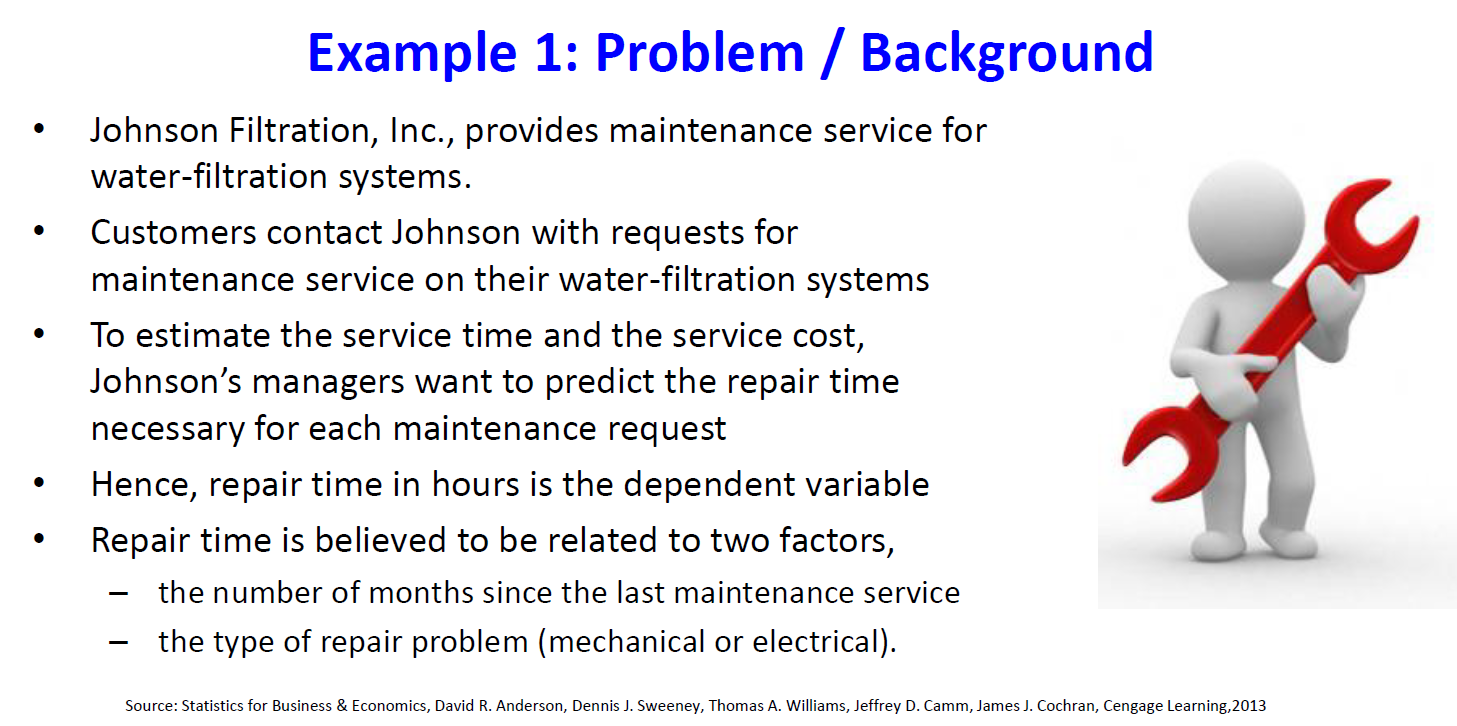

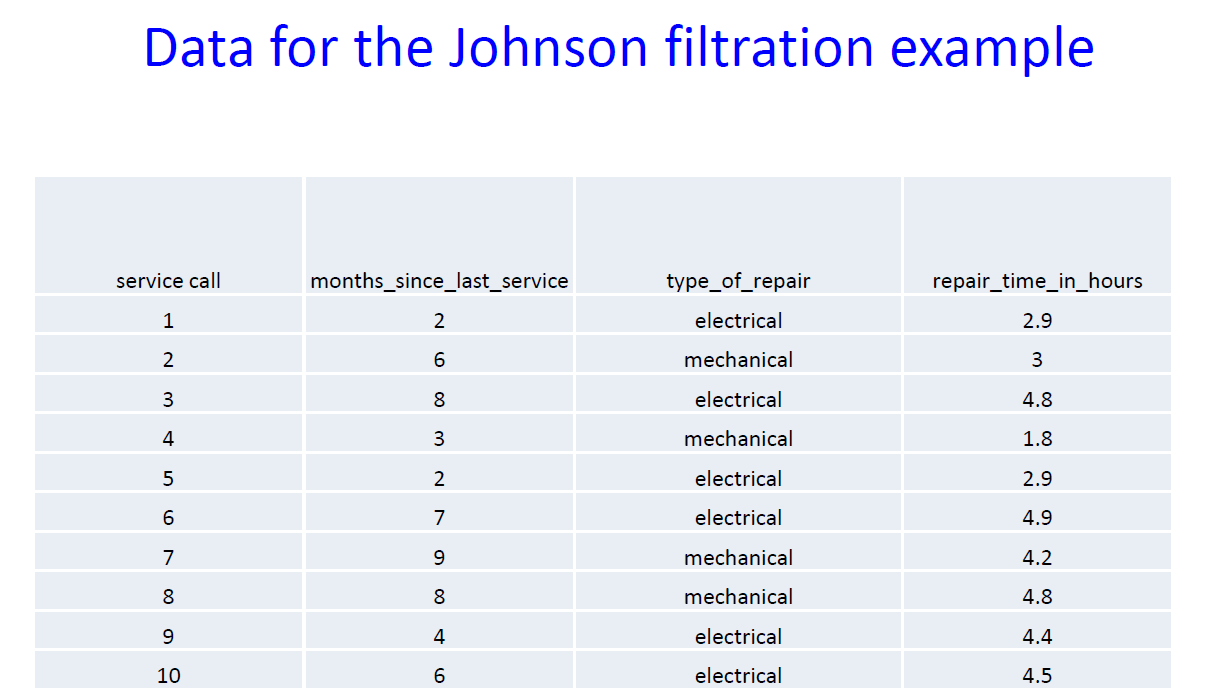

In [26]:
import pandas as pd
import statsmodels.formula.api as sfa
import statsmodels.api as sm
import statsmodels.regression.linear_model as smlm
import seaborn as sns

In [22]:
df = pd.read_excel(r'D:\ERA_ML\IIT Roorkee\Dataset\week_7\Week 7 (Important Data)-20220425T104054Z-001\Week 7 (Important Data)\dummy.xlsx')
df

,servicecall,months_since_last_service,type_of_repair,repair_time_in_hours
0,1,2,electrical,2.9
1,2,6,mechanical,3.0
2,3,8,electrical,4.8
3,4,3,mechanical,1.8
4,5,2,electrical,2.9
5,6,7,electrical,4.9
6,7,9,mechanical,4.2
7,8,8,mechanical,4.8
8,9,4,electrical,4.4
9,10,6,electrical,4.5


<AxesSubplot:xlabel='months_since_last_service', ylabel='repair_time_in_hours'>

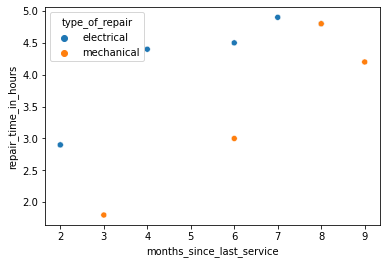

In [23]:
sns.scatterplot(data=df, x="months_since_last_service", y="repair_time_in_hours", hue="type_of_repair")

#### It seems to be an linear relationship between IND VAR and DEP VAR 

In [24]:
# Considering only one IV (months since last service)

model_1= sfa.ols('repair_time_in_hours ~ months_since_last_service',data=df).fit()
model_1.summary()

C:\Users\Z028726\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     repair_time_in_hours   R-squared:                       0.534
Model:                              OLS   Adj. R-squared:                  0.476
Method:                   Least Squares   F-statistic:                     9.174
Date:                  Wed, 18 May 2022   Prob (F-statistic):             0.0163
Time:                          06:59:55   Log-Likelihood:                -10.602
No. Observations:                    10   AIC:                             25.20
Df Residuals:                         8   BIC:                             25.81
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     2.1473      0.605      3.549      0.008       0.752       3.542
months_since_last_service     0.3041      0.100      3.029      0.016       0.073       0.536
==============================================================================
Omnibus:                        0.907   Durbin-Watson:                   2.154
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.751
Skew:                          -0.501   Prob(JB):                        0.687
Kurtosis:                       2.107   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

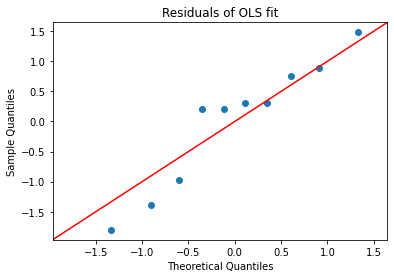

In [29]:
# Normal Probablity Plot
# Normal probablity Plot NPP
import statsmodels.api as s
import matplotlib.pyplot as plt
from scipy import stats
res = model_1.resid # residuals
probplot = s.ProbPlot(res,stats.norm, fit=True)
fig = probplot.qqplot(line='45')
h = plt.title('Residuals of OLS fit') 
plt.show()

In [31]:
dummies = pd.get_dummies(df['type_of_repair'])
dummies


,electrical,mechanical
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
5,1,0
6,0,1
7,0,1
8,1,0
9,1,0


In [32]:
new_df = pd.concat([df,dummies],axis=1)
new_df

,servicecall,months_since_last_service,type_of_repair,repair_time_in_hours,electrical,mechanical
0,1,2,electrical,2.9,1,0
1,2,6,mechanical,3.0,0,1
2,3,8,electrical,4.8,1,0
3,4,3,mechanical,1.8,0,1
4,5,2,electrical,2.9,1,0
5,6,7,electrical,4.9,1,0
6,7,9,mechanical,4.2,0,1
7,8,8,mechanical,4.8,0,1
8,9,4,electrical,4.4,1,0
9,10,6,electrical,4.5,1,0


In [33]:
new_df.drop(labels = ['type_of_repair','mechanical'],axis=1,inplace=True)
new_df

,servicecall,months_since_last_service,repair_time_in_hours,electrical
0,1,2,2.9,1
1,2,6,3.0,0
2,3,8,4.8,1
3,4,3,1.8,0
4,5,2,2.9,1
5,6,7,4.9,1
6,7,9,4.2,0
7,8,8,4.8,0
8,9,4,4.4,1
9,10,6,4.5,1


In [39]:
model_2 = smlm.OLS(new_df['repair_time_in_hours'],sm.add_constant(new_df[['electrical','months_since_last_service']])).fit()
model_2.summary()

C:\Users\Z028726\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     repair_time_in_hours   R-squared:                       0.859
Model:                              OLS   Adj. R-squared:                  0.819
Method:                   Least Squares   F-statistic:                     21.36
Date:                  Wed, 18 May 2022   Prob (F-statistic):            0.00105
Time:                          07:50:23   Log-Likelihood:                -4.6200
No. Observations:                    10   AIC:                             15.24
Df Residuals:                         7   BIC:                             16.15
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.9305      0.467      1.993      0.087      -0.174       2.035
electrical                    1.2627      0.314      4.020      0.005       0.520       2.005
months_since_last_service     0.3876      0.063      6.195      0.000       0.240       0.536
==============================================================================
Omnibus:                        3.357   Durbin-Watson:                   1.136
Prob(Omnibus):                  0.187   Jarque-Bera (JB):                1.663
Skew:                           0.994   Prob(JB):                        0.435
Kurtosis:                       2.795   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

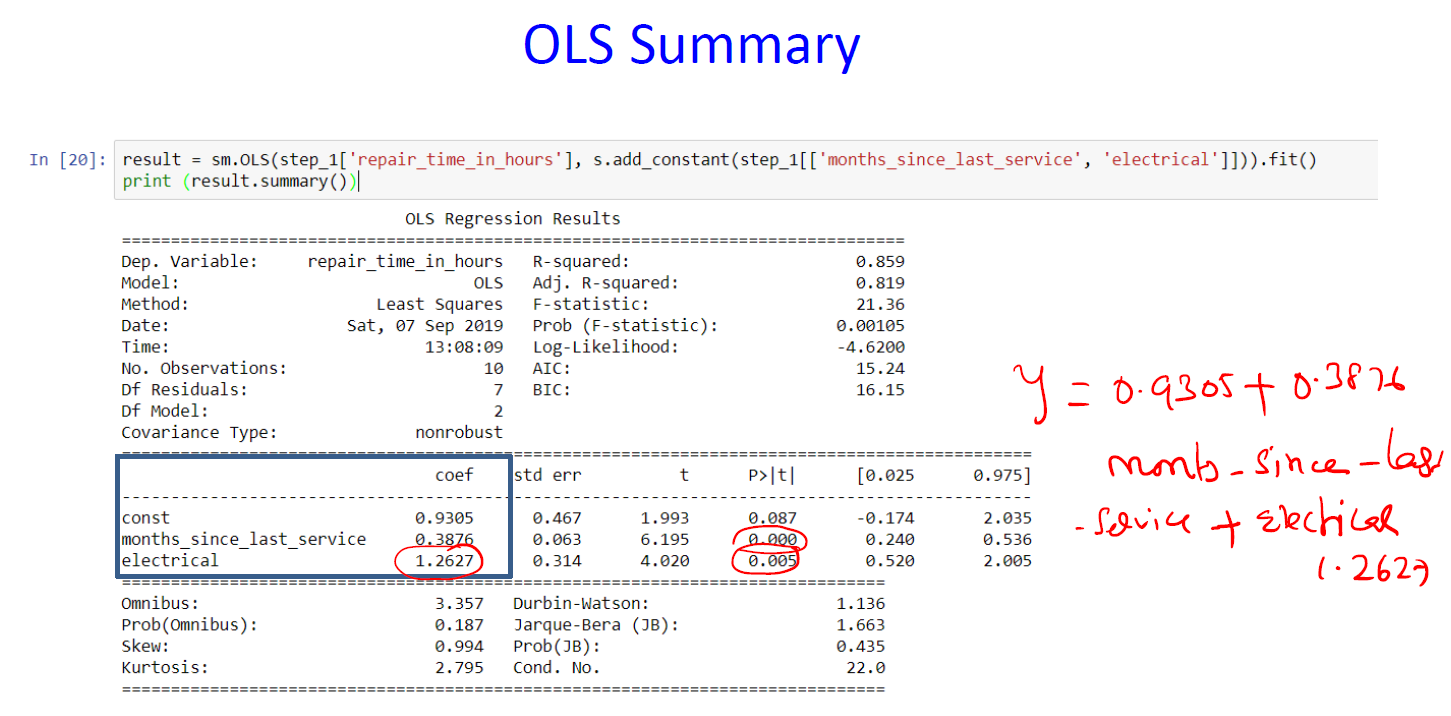

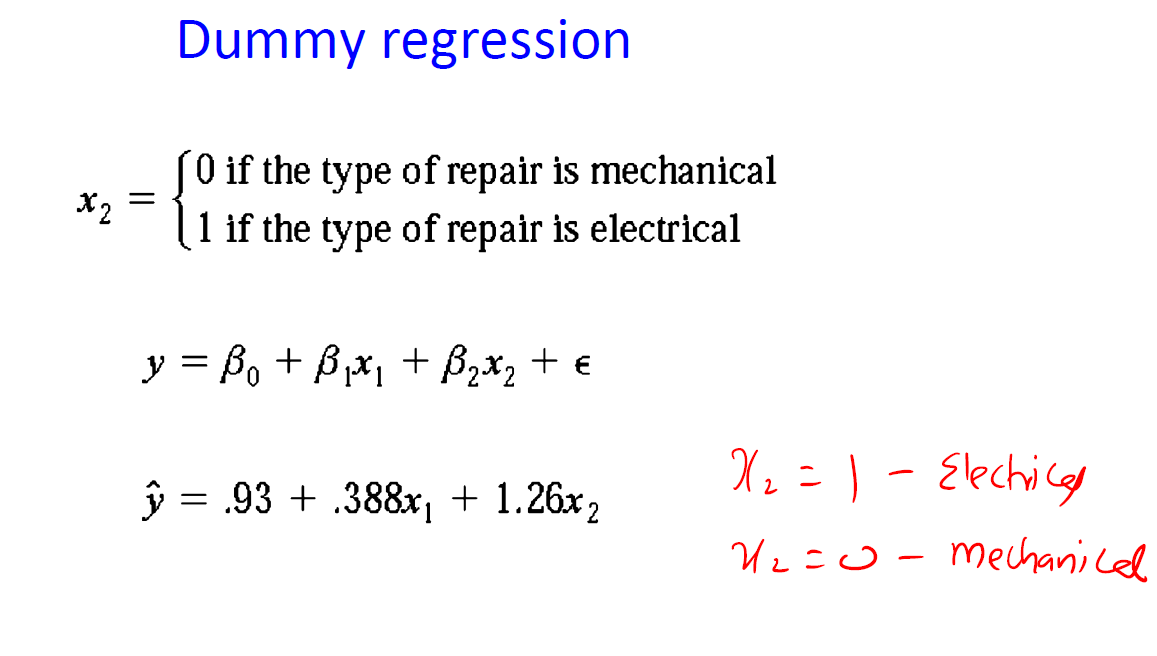


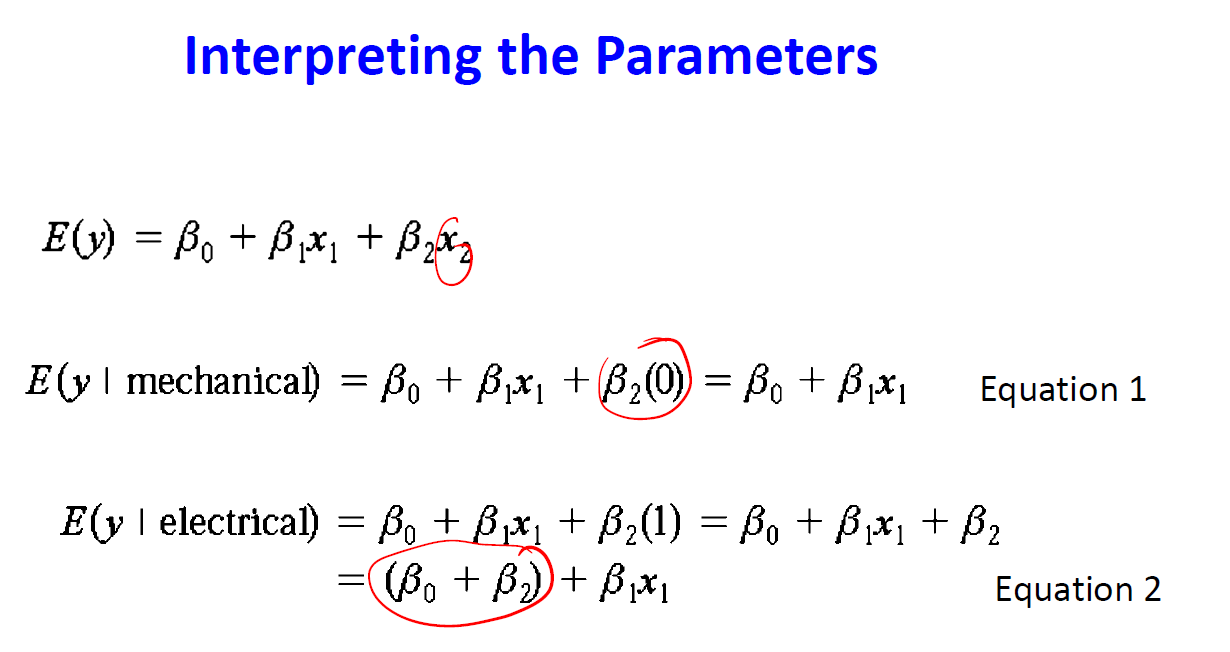

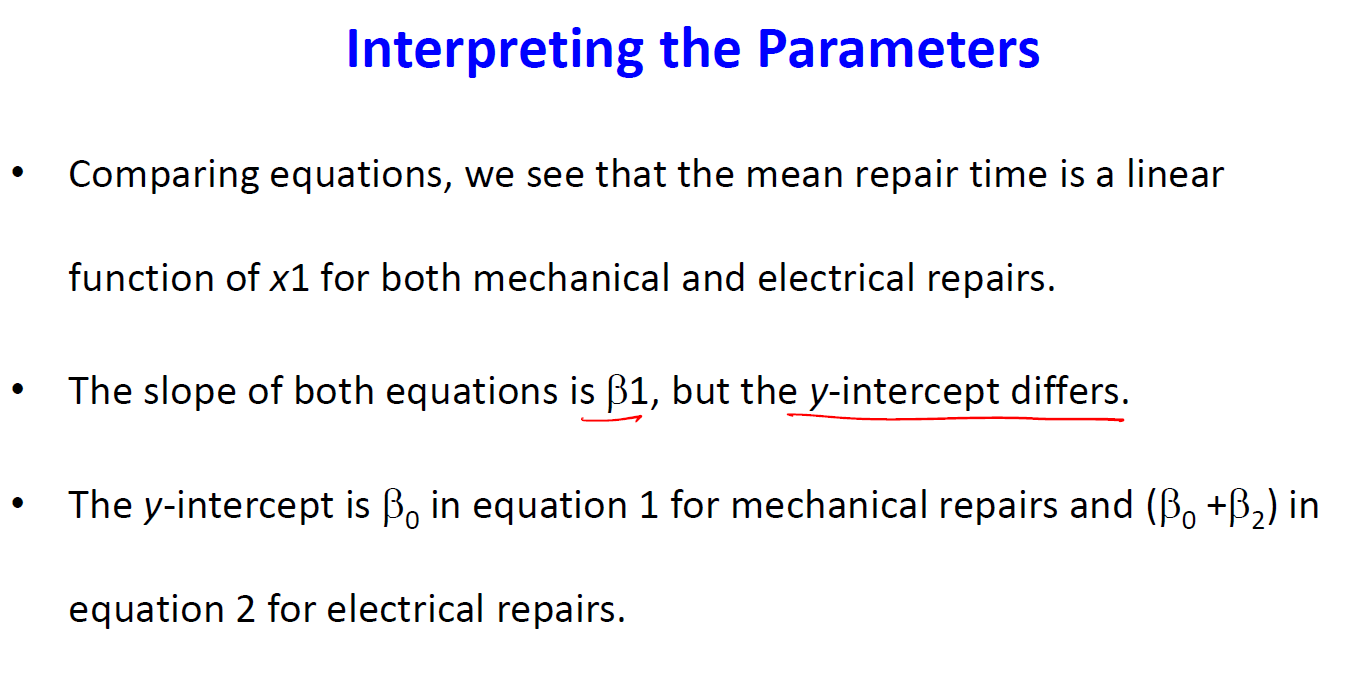

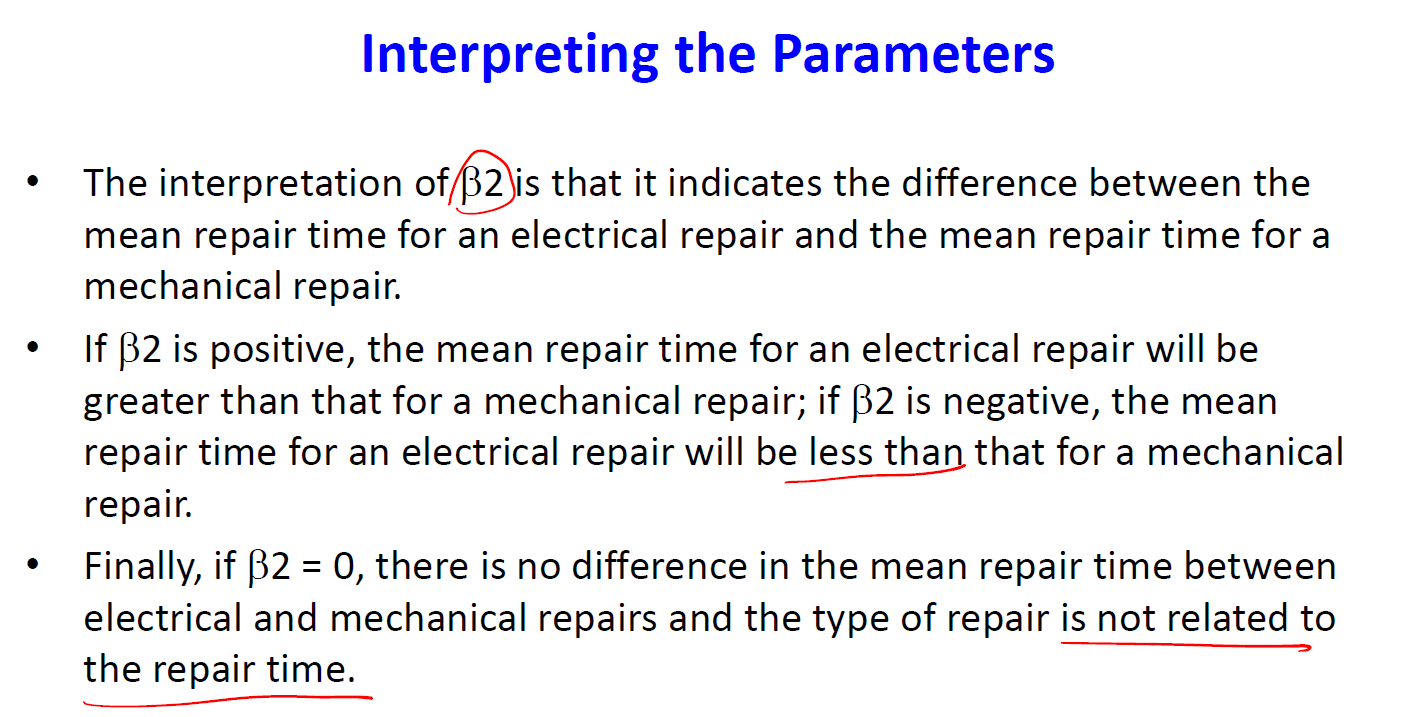

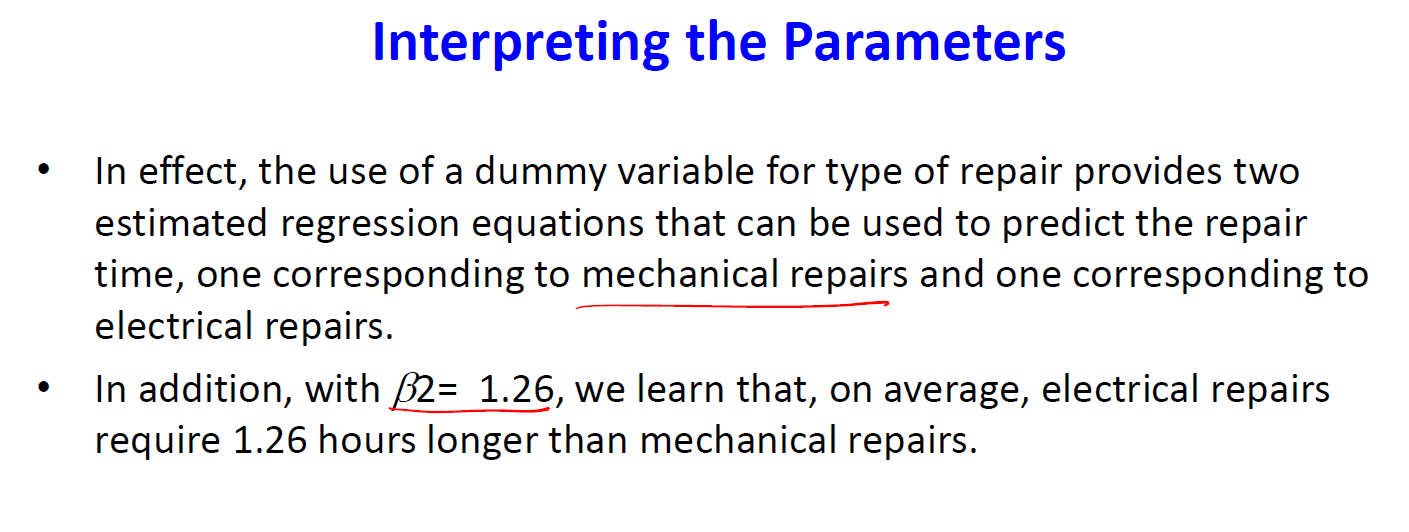

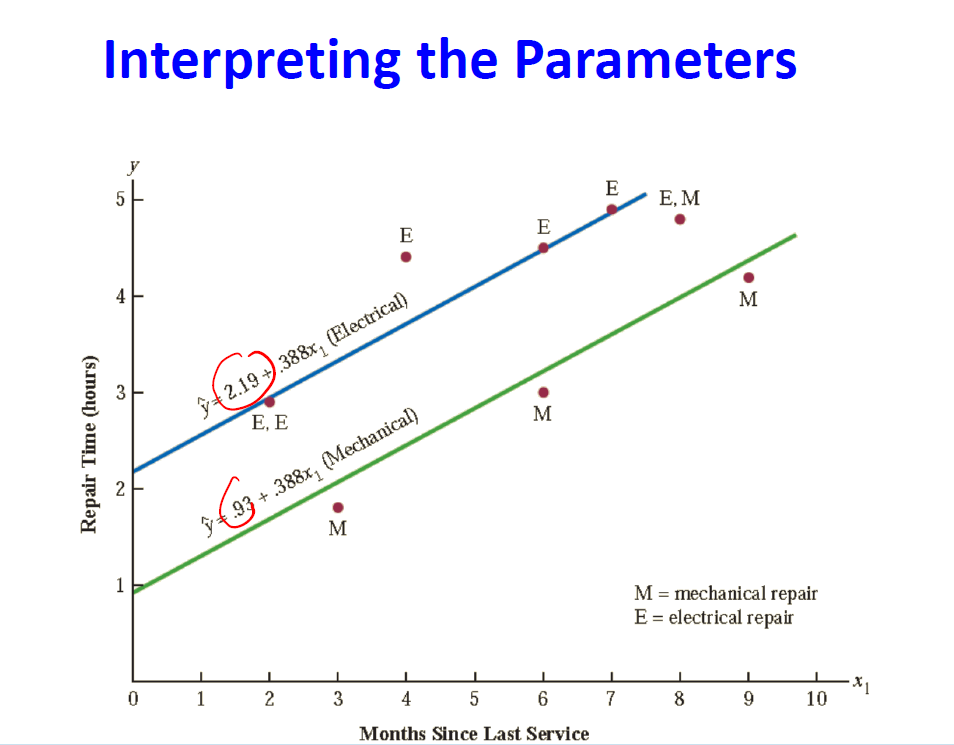